## Outliers

Outliers are data points that are significantly different from the rest of the dataset. They lie far away from the "typical" range of data points and can distort statistical analysis, leading to misleading results.

- Reasons for outliers: measurement errors, experimental variability, natural data variation.

- Outliers can badly affect the accuracy and reliability of machine learning models and statistical conclusions.

- Hence, identifying and handling outliers is a crucial preprocessing step in data analysis and ML pipelines.

#### Identifying Outliers

**Visual Inspection**

- Use plots—histograms, scatter plots, and especially box plots.

- Outliers appear as points isolated from the bulk of data (like dots outside the whiskers of a box plot).

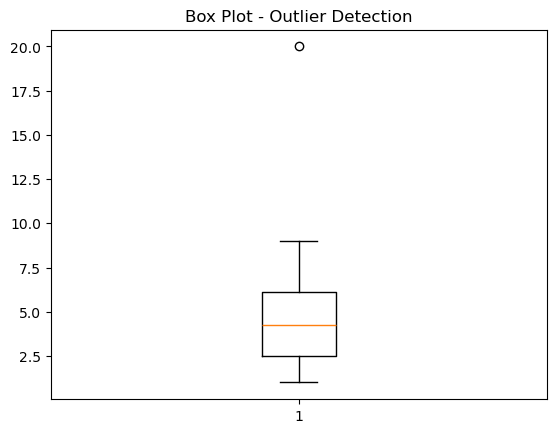

In [3]:
# Visualizing Outliers with Box Plot

import matplotlib.pyplot as plt
import numpy as np

data = np.array([5, 2, 4.5, 4, 3, 2, 6, 20, 9, 2.5, 3.5, 4.75, 6.5, 2.5, 8, 1])

plt.boxplot(data)
plt.title("Box Plot - Outlier Detection")
plt.show()

# Outliers appear as points outside the whiskers.

**Statistical Methods**

1.**Z-Score**
Measures how many standard deviations a data point is from the mean.  

$$
Z = \frac{X - \mu}{\sigma}
$$

where:  
- $X$ = data point  
- $\mu$ = mean  
- $\sigma$ = standard deviation  


Common rule: \(|Z| > 3\) is considered an outlier.   
Assumes data is roughly normally distributed.  


In [1]:
# Using Z-Score to Detect Outliers

import numpy as np
from scipy import stats

data = np.array([5, 2, 4.5, 4, 3, 2, 6, 20, 9, 2.5, 3.5, 4.75, 6.5, 2.5, 8, 1])

# Calculate Z-scores
z_scores = np.abs(stats.zscore(data))

# Set threshold, e.g., 3
threshold = 3

# Identify outliers
outliers = data[z_scores > threshold]
print("Outliers (Z-score method):", outliers)

# Expected output: Points far from mean, for example 20 in the data above.

Outliers (Z-score method): [20.]


2.**Interquartile Range (IQR)**
Represents the spread of the middle 50% of data.  

$$
IQR = Q_3 - Q_1
$$

where:  
- $Q_1$ = 25th percentile  
- $Q_3$ = 75th percentile  

Outliers are data points below $Q_1 - 1.5 \times IQR$ or above $Q_3 + 1.5 \times IQR$.  
More robust to outliers than Z-score since it uses median and percentiles.  

**Quartiles**

Quartiles break the data into four equal parts (25% each). They split data at:

- Q1(First quartile): 25th percentile (median of lower half)
- Q2(Second quartile ≈ Median): 50th percentile
- Q3(Third quartile): 75th percentile (median of upper half)

These quartiles help describe data spread and are used to calculate the IQR.

In [2]:
# Using IQR to Detect Outliers

import numpy as np

data = np.array([5, 2, 4.5, 4, 3, 2, 6, 20, 9, 2.5, 3.5, 4.75, 6.5, 2.5, 8, 1])

Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = data[(data < lower_bound) | (data > upper_bound)]
print("Outliers (IQR method):", outliers_iqr)

# Expected output includes values outside the fences, e.g., 20 (and possibly 1 if it falls below).

Outliers (IQR method): [20.]


Pandas has a .quantile() method that accepts an argument as a single value or list of values of quantiles to compute.

- Use the .quantile() method with argument equal to .25 to determine the first quartile of the base_salary column. Assign your answer to the variable first_quartile.
- Use the .quantile() method with argument equal to .75 to determine the third quartile of the base_salary column. Assign your answer to the variable third_quartile.

3.**Clustering** (More Advanced)
- Clustering groups similar points.  
- Points that don’t belong to any cluster, or form their own clusters, can be considered outliers. 

| Method            | Key Concept                     | Python Function/Package                  | Suitable For                |
|-------------------|---------------------------------|------------------------------------------|-----------------------------|
| Z-Score           | # std deviations from mean      | scipy.stats.zscore                        | Normally distributed data   |
| IQR               | Spread of central 50%           | numpy.percentile + manual thresholding    | Robust to outliers          |
| Visual Inspection | Box plots, scatter plots        | matplotlib.pyplot.boxplot                 | General exploratory         |


By combining visualization and statistical methods like Z-score and IQR (both available in Python libraries like NumPy, SciPy, and Matplotlib), you can reliably detect and handle outliers to improve the quality of your data and model results.

In [ ]:
# Sources:

# [1](https://absentdata.com/python/how-to-find-outliers-in-python/)
# [2](https://www.geeksforgeeks.org/machine-learning/z-score-for-outlier-detection-python/)
# [3](https://towardsdatascience.com/3-simple-statistical-methods-for-outlier-detection-db762e86cd9d/)
# [4](https://www.scribbr.com/statistics/outliers/)
# [5](https://www.geeksforgeeks.org/machine-learning/interquartile-range-to-detect-outliers-in-data/)
# [6](https://www.youtube.com/watch?v=STSP8gTSdT8)
# [7](https://www.investopedia.com/terms/q/quartile.asp)
# [8](https://www.youtube.com/watch?v=5ZaWtQAtMSM)
# [9](https://builtin.com/data-science/how-find-outliers-examples)
# [10](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule)
# [11](https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/)
# [12](https://online.stat.psu.edu/stat200/lesson/3/3.2)
# [13](https://stackoverflow.com/questions/73916972/detect-outliers-using-iqr-and-remove-them-using-the-zscore)
# [14](https://articles.outlier.org/what-are-quartiles-in-statistics)
# [15](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm)
# [16](https://discovery.cs.illinois.edu/learn/Exploratory-Data-Analysis/Quartiles-and-Box-Plots/)